# Prediction Analysis of Risky Credit using Neural Networks, Decision Trees with 10 fold CV and Random Forests

<br>
<br>

## The objective of the problem is to develop a model for correctly identifying the credit risk of a customer for a bank.

## About the dataset

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

The attributes are : 

- Age: Age in years ranging from 19 to 120
- Amount: Credit amount any value	from zero to 20,000
- checking:Existing	status	of	checking	account - 1, 2,	3 or 4
- coapp: Status	of	other	debtors/guarantors - 1,	2 or 3
- depends: Dependents	1 (none)	or	2(1	or	more)
- duration: Interval Loan	duration:		1	to	72 months
- employed: Employment	duration	status:	1,	2,	3,	4	or	5
- existcr:  Number	of	existing	bank	loans:		1,	2,	3	or	4
- foreign: Foreign	worker:		1	(yes)	or	2	(no)
- good_bad: Credit	rating:	‘bad’	or	‘good’
- history: Credit	history:		0,	1,	2,	3	or	4
- housing: Housing	status:	1,	2,	or	3
- installp: Installment	rate	as	percent	of	income:		1,	2,	3	or	4
- job: Employment	status:		1,	2,	3	or	4
- marital: Status	and	gender:	1, 2,	3	or	4
- other: Other	installment	plans:		1,	2	or	3
- property: Property	ownership:		1,	2,	3	ore	4
- purpose: Loan	purpose:		0,	1,	2,	3,	4,	5,	6,,	8,	9,	X	(capital	X)
- resident: Permanent	residence	status:		1,	2,	3	or	4
- savings: Savings	account	status:		1,	2,	3,	4	or	5
- Telephone: 1(no	registered	phone)	or	2(registered	phone)


## Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#preprocessing">Data pre-processing and selection (Data Imputation-Replacement-Outliers Analysis)</a></li>
        <li><a href="#modeling">Modeling on Neural Networks</a></li>
        <li><a href="#modeling">Modeling on Decision Trees with 10 fold CV</a></li>
        <li><a href="#modeling">Modeling on Random Forests</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

### **Step 1 - Import Needed Modules** 
Note that we are importing several new modules. First a new class created for this course Class_FNN. This class can be used to print the results. It is not needed if you prefer to handle your own printing, and feel free to modify the approach used in this class. <br>
Second, we are also importing several new modules for create and displaying the tree. The MLPClassifier from sklearn fits a neural network for classifying binary and nominal targets. All
columns in X and y must be numeric. All nominal attributes in X must be encoded. This is not necessary for y, but y must be a nominal or binary target encoded using integers.

In [21]:
# our classes for printing results and encoding
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math
from AdvancedAnalytics import NeuralNetwork
from AdvancedAnalytics import ReplaceImputeEncode
from AdvancedAnalytics import DecisionTree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### **Step 2: Read Data and Create Data Map** 
The data map is some of your metadata. It describes your attributes, their level (interval, binary or nominal), and the characteristics of that attributes.<br>
Here is the data map constructed from the data dictionary for this data file. Notice that the nominal attributes purpose contains categories that appear to be integers and one category that is a string ’X’. In a data map you should not mix data types. The integers are read as strings since there is one category that is a string. As a result the integers in the data map are entered with a string representation: ’1’, ’2’, ..., ’X’.<br>
Also note that category ’7’ is absent. It is not in these data. If you the number of categories described for a nominal attribute does not agree with what appears in the data, an error message occurs during encoding.

In [11]:
df = pd.read_excel("CreditHistory_Clean.xlsx")
# First Integer Designates Data Type
# 'I'=Interval, 'B'=Binary, 'N'=Nominal, 'Z'=Other (No Changes, Exclude)
attribute_map = { \
'age':['I',(19,120)], \
'amount': ['I',(0,20000)], \
'checking': ['N',(1,2,3,4)], \
'coapp': ['N',(1,2,3)], \
'depends': ['B',(1,2)], \
'duration': ['I',(1,72)], \
'employed': ['N',(1,2,3,4,5)], \
'existcr': ['N',(1,2,3,4)], \
'foreign': ['B',(1,2)], \
'good_bad': ['B',('bad','good')], \
'history': ['N',(0,1,2,3,4)], \
'housing':['N',(1,2,3)], \
'installp': ['N',(1,2,3,4)], \
'job': ['N',(1,2,3,4)], \
'marital': ['N',(1,2,3,4)], \
'other': ['N',(1,2,3)], \
'property': ['N',(1,2,3,4)], \
'purpose': ['N',('0', '1','2','3','4','5','6', '8','9','X')],\
'resident': ['N',(1,2,3,4)], \
'savings': ['N',(1,2,3,4,5)], \
'telephon': ['B',(1,2)] \
}

### **Step 3: Replace-Impute-Encode** 
Next, use the class ReplaceImputeEncode( ). Normally this is used to identify outliers, replace them with missing values and then impute those values. In this case, the data are clean. This is not necessary, but we do need one-hot encoding for the nominal attributes, and we do not want to drop the last of these encoded columns.<br>
For this we set nominal encoding to one-hot and drop to False.

In [12]:
# drop=False - do not drop last category - used for Decision Trees
rie = ReplaceImputeEncode(data_map=attribute_map, nominal_encoding='one-hot', \
interval_scale=None, drop=False, display=True)
#features_map = rie.draft_features_map(df)
encoded_df = rie.fit_transform(df)


********** Data Preprocessing ***********
Features Dictionary Contains:
3 Interval, 
4 Binary, 
14 Nominal, and 
0 Excluded Attribute(s).

Data contains 1000 observations & 21 columns.


Attribute Counts
............... Missing  Outliers
age.......         0         0
amount....         0         0
checking..         0         0
coapp.....         0         0
depends...         0         0
duration..         0         0
employed..         0         0
existcr...         0         0
foreign...         0         0
good_bad..         0         0
history...         0         0
housing...         0         0
installp..         0         0
job.......         0         0
marital...         0         0
other.....         0         0
property..         0         0
purpose...         0         0
resident..         0         0
savings...         0         0
telephon..         0         0


As a check, notice that no outliers or missing values were found. Also note that the number of columns in the data equals the number of interval, binary and nominal attributes. This should always be the case. If not, an error has occured. The number of attributes is taken from the data map. The number of columns is the actual number in the data. They should match.

### **Step 4: Create X and y** 
Now create the features (X) and target (y) for building your decision tree. Note that the all features must be numeric, and all nominal features must be encoded. If not, either a runtime error will occur or the nominal attributes will be handled incorrectly as interval variables.<br>
Also note that for sklearn decision trees will accept pandas dataframes as input. It is not necessary to convert them to numpy arrays. This is useful because we used pandas to read the data, and a pandas dataframe maintains the attribute names, and allows for indexing using those names.

In [13]:
y = encoded_df['good_bad'] # The target is not scaled or imputed
X = encoded_df.drop('good_bad',axis=1)
# convert pandas column vector 'y' to a numpy row vector 'np_y'
np_y = np.ravel(y)

### **Step 5: Cross Validation**
Setup a list for the parameters you want to evaluate and a list of the scoring metrics you want to compare during cross validation. In this case we are comparing neural networks with a different number of hidden layers and number of neurons.<br>
In this case we are using ten-fold cross validation by setting the cv parameter to ten, cv=10.

In [15]:
# Cross-Validation
best_network = 0
best_alpha = 0
best_F1 = 0
network_list = [(3), (11), (5,4), (6,5), (7,6), (8,7)]
alpha_list = [0, 0.1, 0.15, 0.2, 0.25, 0.3]
score_list = ['accuracy', 'recall', 'precision', 'f1']
for nn in network_list:
    print("\nNetwork: ", nn)
    for a in alpha_list:
        print("\nAlpha: ", a)
        fnn = MLPClassifier(hidden_layer_sizes=nn, activation='tanh', \
            alpha=a, tol=1e-32, solver='lbfgs', \
            max_iter=5000, random_state=12345)
        scores = cross_validate(fnn, X, np_y, scoring=score_list, \
                return_train_score=False, cv=10)
        print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
        for s in score_list:
            var = "test_"+s
            mean = scores[var].mean()
            std = scores[var].std()
            print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
            if s == "f1" and best_F1 < mean:
                best_F1 = mean
                best_network = nn
                best_alpha = a


Network:  3

Alpha:  0
Metric.......  Mean    Std. Dev.
accuracy..... 0.7000    0.0000
recall....... 1.0000    0.0000
precision.... 0.7000    0.0000
f1........... 0.8235    0.0000

Alpha:  0.1
Metric.......  Mean    Std. Dev.
accuracy..... 0.7410    0.0399
recall....... 0.8914    0.0655
precision.... 0.7798    0.0530
f1........... 0.8284    0.0222

Alpha:  0.15
Metric.......  Mean    Std. Dev.
accuracy..... 0.7280    0.0256
recall....... 0.8300    0.0370
precision.... 0.7925    0.0231
f1........... 0.8101    0.0193

Alpha:  0.2
Metric.......  Mean    Std. Dev.
accuracy..... 0.7420    0.0504
recall....... 0.8371    0.0569
precision.... 0.8027    0.0307
f1........... 0.8189    0.0384

Alpha:  0.25
Metric.......  Mean    Std. Dev.
accuracy..... 0.7440    0.0403
recall....... 0.8300    0.0364
precision.... 0.8103    0.0348
f1........... 0.8195    0.0281

Alpha:  0.3
Metric.......  Mean    Std. Dev.
accuracy..... 0.7440    0.0380
recall....... 0.8386    0.0409
precision.... 0.8041    0.024

- The metrics are based upon ten folds. That is the mean and standard deviations are calculated
from ten sets of validation data, each consisting of 10% of the data randomly selected, i.e. 100
observations.<br>
- Randomization is controlled by the random_state setting. In this case the random number
seed is being set to 12345. Results obtain using the same seed value should agree.<br>
- Although the differences in F1 between the networks is small, the (7, 6) network has the highest F1 score with regularization set by alpha=0.3. This network will be selected as the best.

In [16]:
print("The Best Network with F1=", best_F1)
print(" Perceptrons: ", best_network)
print(" Alpha: ", best_alpha)

The Best Network with F1= 0.8358816148479514
 Perceptrons:  (8, 7)
 Alpha:  0.3


### **Step 6: Evalute the model using Simple Cross Validation*** 
Here we split the data into two parts, a training and validation part consisting of 70% and 30% of the data, respectively.

In [19]:
# Evaluate the tree with the best depth
X_train, X_validate, y_train, y_validate = \
    train_test_split(X, np_y,test_size = 0.3, random_state=7)
fnn = MLPClassifier(hidden_layer_sizes=best_network, activation='tanh', \
    alpha=best_alpha, tol=1e-32, solver='lbfgs', \
    max_iter=5000, random_state=12345)
fnn = fnn.fit(X_train,y_train)
NeuralNetwork.display_binary_split_metrics(fnn, X_train, y_train, \
    X_validate, y_validate)



Model Metrics..........       Training     Validation
Observations...........            700            300
Features...............             68             68
Number of Layers.......              2              2
Number of Outputs......              1              1
Number of Neurons......             15             15
Number of Weights......            623            623
Number of Iterations...            815            815
Activation Function....       logistic       logistic
Mean Absolute Error....         0.3029         0.2990
Avg Squared Error......         0.1499         0.1493
Accuracy...............         0.7814         0.7733
Precision..............         0.8125         0.8197
Recall (Sensitivity)...         0.8882         0.8802
F1-score...............         0.8487         0.8489
MISC (Misclassification)...      21.9%          22.7%
     class 0...............      45.6%          50.6%
     class 1...............      11.2%          12.0%


Training
Confusion Matri

The neural Network Model preditcted with accuracy of 77.33 %, Recall of 88.02%, precision of 81.97% and F1 score of 84.89% on Validation Data.

## **Model Building with Decision Tree with 10 fold cross validation.**

Search depths are 5,6,7,8,10,12,15,20,25.

Split Criteria - Gini

In [22]:
#Decision Tree
#10 fold CV with variation of depth
score_list = ['accuracy', 'recall', 'precision', 'f1']
search_depths = [5,6,7,8,10,12,15,20,25]
for d in search_depths:
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=d, min_samples_split=5, min_samples_leaf=5)
    mean_score = []
    std_score = []
    print("max_depth=", d)
    print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
    for s in score_list:
        dtc_10 = cross_val_score(dtc, X, y, scoring=s, cv=10)
        mean = dtc_10.mean()
        std = dtc_10.std()
        mean_score.append(mean)
        std_score.append(std)
        print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))

max_depth= 5
Metric.......  Mean    Std. Dev.
accuracy..... 0.7190    0.0281
recall....... 0.8700    0.0386
precision.... 0.7662    0.0396
f1........... 0.8117    0.0124
max_depth= 6
Metric.......  Mean    Std. Dev.
accuracy..... 0.7110    0.0187
recall....... 0.8429    0.0503
precision.... 0.7743    0.0433
f1........... 0.8022    0.0091
max_depth= 7
Metric.......  Mean    Std. Dev.
accuracy..... 0.7100    0.0358
recall....... 0.8357    0.0439
precision.... 0.7702    0.0421
f1........... 0.8000    0.0198
max_depth= 8
Metric.......  Mean    Std. Dev.
accuracy..... 0.6990    0.0298
recall....... 0.8086    0.0439
precision.... 0.7764    0.0409
f1........... 0.7904    0.0214
max_depth= 10
Metric.......  Mean    Std. Dev.
accuracy..... 0.7000    0.0397
recall....... 0.7943    0.0535
precision.... 0.7876    0.0481
f1........... 0.7900    0.0266
max_depth= 12
Metric.......  Mean    Std. Dev.
accuracy..... 0.6910    0.0386
recall....... 0.7800    0.0508
precision.... 0.7847    0.0311
f1.......

Depth Selected - 5 with accuracy of 71.9 %, Recall of 87.0%, precision of 76.62% and F1 score of 81.17%. This is lower than the Neural Networks prediction.

In [25]:
dtc7030 = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=5, min_samples_leaf=5)
dtc7030 = dtc7030.fit(X_train,y_train)
dtczz = DecisionTreeClassifier(criterion='gini', max_depth=5,min_samples_split=5, min_samples_leaf=5)
dtcyy = dtczz.fit(X_train,y_train)
predtree = dtc7030.predict(X_validate)
trainpred=dtc7030.predict(X_train)
print("Accuracy on Validation Data of Decision Trees with Depth 5: " , metrics.accuracy_score(y_validate, predtree))

Accuracy on Validation Data of Decision Trees with Depth 5:  0.6933333333333334


In [26]:
#visual confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validate, predtree, labels=[1,0])
np.set_printoptions(precision=2)

Test Data Prediction
Confusion matrix, without normalization
[[170  47]
 [ 45  38]]


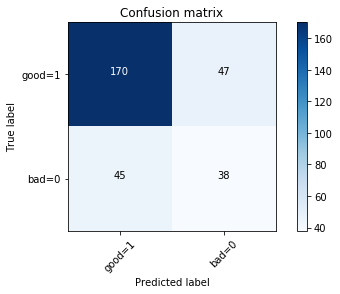

In [28]:
print("Test Data Prediction")
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['good=1','bad=0'],normalize= False,  title='Confusion matrix')

In [31]:
print("Test Data Prediction")
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_validate, predtree))
accuracy=(170+38)/(170+47+45+38)
print("Accuracy:",accuracy)

Test Data Prediction
              precision    recall  f1-score   support

         0.0       0.45      0.46      0.45        83
         1.0       0.79      0.78      0.79       217

   micro avg       0.69      0.69      0.69       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.70      0.69      0.69       300

Accuracy: 0.6933333333333334


Train Data Prediction
Confusion matrix, without normalization
[[418  65]
 [ 95 122]]


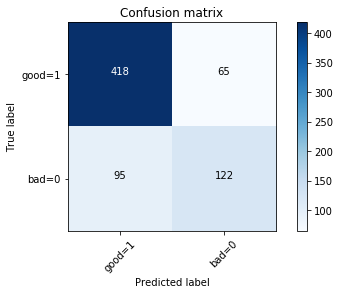

In [30]:
print("Train Data Prediction")
#train Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, trainpred, labels=[1,0])
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['good=1','bad=0'],normalize= False,  title='Confusion matrix')

In [32]:
print("Train Data Prediction")
from sklearn.metrics import classification_report
print (classification_report(y_train, trainpred))
accuracy=(418+122)/(418+122+95+65)
print("Accuracy:",accuracy)

Train Data Prediction
              precision    recall  f1-score   support

         0.0       0.65      0.56      0.60       217
         1.0       0.81      0.87      0.84       483

   micro avg       0.77      0.77      0.77       700
   macro avg       0.73      0.71      0.72       700
weighted avg       0.76      0.77      0.77       700

Accuracy: 0.7714285714285715


## **Random Forests**

Depths consisdered : None, 2, 3, 4, 5, 6, 7, 8, 9, 10

Trees : 10, 20, 50, 100, 500

In [44]:
# Cross-Validation
max_depth_list =  [2, 3, 4, 5, 6, 7, 8, 9, 10]
n_trees_list = [10, 20, 50, 100, 500]
score_list = ['accuracy', 'recall', 'precision', 'f1']
max_f1 = 0
n_trees = 100
for n_trees in n_trees_list:
    for d in max_depth_list:
        print("\nNumber of Trees: ", n_trees, " Max_Depth: ", d)
        rfc = RandomForestClassifier(n_estimators=n_trees, criterion="gini",max_depth=d, min_samples_split=2,min_samples_leaf=1, max_features='auto', n_jobs=4, bootstrap=True, random_state=12345)
        scores = cross_validate(rfc, X, np_y, scoring=score_list, return_train_score=False, cv=5)
        print("{:.<13s}{:>6s}{:>13s}".format("Metric", "Mean", "Std. Dev."))
        for s in score_list:
            var = "test_"+s
            mean = scores[var].mean()
            std = scores[var].std()
            print("{:.<13s}{:>7.4f}{:>10.4f}".format(s, mean, std))
        if mean > max_f1:
            max_f1 = mean
            best_depth = d
            best_n_trees = n_trees
print("\nBest based on F1-Score from a forest with ", best_n_trees, " trees.")
print("Best Depth (trees) = ", best_depth)


Number of Trees:  10  Max_Depth:  2
Metric.......  Mean    Std. Dev.
accuracy..... 0.7030    0.0098
recall....... 0.9957    0.0057
precision.... 0.7034    0.0059
f1........... 0.8244    0.0054

Number of Trees:  10  Max_Depth:  3
Metric.......  Mean    Std. Dev.
accuracy..... 0.7030    0.0087
recall....... 0.9886    0.0073
precision.... 0.7054    0.0048
f1........... 0.8233    0.0051

Number of Trees:  10  Max_Depth:  4
Metric.......  Mean    Std. Dev.
accuracy..... 0.7190    0.0102
recall....... 0.9871    0.0095
precision.... 0.7176    0.0063
f1........... 0.8310    0.0060

Number of Trees:  10  Max_Depth:  5
Metric.......  Mean    Std. Dev.
accuracy..... 0.7070    0.0150
recall....... 0.9571    0.0175
precision.... 0.7181    0.0061
f1........... 0.8205    0.0102

Number of Trees:  10  Max_Depth:  6
Metric.......  Mean    Std. Dev.
accuracy..... 0.7340    0.0156
recall....... 0.9486    0.0146
precision.... 0.7431    0.0138
f1........... 0.8332    0.0085

Number of Trees:  10  Max_Dep

Metric.......  Mean    Std. Dev.
accuracy..... 0.7460    0.0162
recall....... 0.9429    0.0243
precision.... 0.7555    0.0135
f1........... 0.8386    0.0105

Number of Trees:  500  Max_Depth:  9
Metric.......  Mean    Std. Dev.
accuracy..... 0.7520    0.0081
recall....... 0.9357    0.0260
precision.... 0.7637    0.0082
f1........... 0.8407    0.0074

Number of Trees:  500  Max_Depth:  10
Metric.......  Mean    Std. Dev.
accuracy..... 0.7570    0.0103
recall....... 0.9343    0.0287
precision.... 0.7689    0.0104
f1........... 0.8432    0.0086

Best based on F1-Score from a forest with  100  trees.
Best Depth (trees) =  10


In [45]:
rfc = RandomForestClassifier(n_estimators=best_n_trees, criterion="gini",max_depth=best_depth, min_samples_split=2,min_samples_leaf=1, max_features='auto', n_jobs=4, bootstrap=True, random_state=12345)
rfc= rfc.fit(X_train, y_train)
DecisionTree.display_binary_split_metrics(rfc, X_train, y_train,X_validate, y_validate)



Model Metrics..........       Training     Validation
Observations...........            700            300
Features...............             68             68
Maximum Tree Depth.....             10             10
Minimum Leaf Size......              1              1
Minimum split Size.....              2              2
Mean Absolute Error....         0.2126         0.3368
Avg Squared Error......         0.0629         0.1512
Accuracy...............         0.9671         0.7967
Precision..............         0.9545         0.8047
Recall (Sensitivity)...         1.0000         0.9493
F1-score...............         0.9767         0.8710
MISC (Misclassification)...       3.3%          20.3%
     class 0...............      10.6%          60.2%
     class 1...............       0.0%           5.1%


Training
Confusion Matrix  Class 0   Class 1  
Class 0.....       194        23
Class 1.....         0       483


Validation
Confusion Matrix  Class 0   Class 1  
Class 0.....        33

The Random Forest model results the accruacy of 79.67%, Recall of 94.93%, precision of 80.47% and F1 score of 87.10%. This shows better results than Neural Network - (8,7). 